<a href="https://colab.research.google.com/github/ASLManasa/MY_Ml/blob/master/LogisticRegression(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link to dataset : https://www.kaggle.com/brendan45774/test-file


Logistic regression is a classification algorithm. It uses sigmoid function to range the values. Its equation is log(y/1-y) range will be -infinity to infinity 

In [1]:
import numpy as np
#scientific calci
import pandas as pd
import matplotlib.pyplot as plt
#plotting
import seaborn as sns
#statistical plotting
%matplotlib inline
import math

In [2]:
titanic = pd.read_csv('/content/tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(str(len(titanic.index)))
#no of passengers

In [ ]:
titanic.describe()

ANALYSE DATA

In [ ]:
sns.countplot(x ='Survived',hue ='Sex',data = titanic)

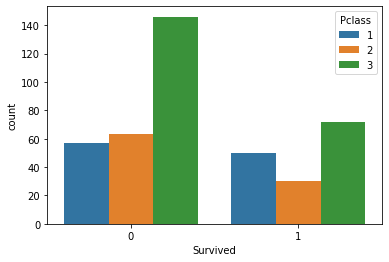

In [7]:
sns.countplot(x ='Survived',hue ='Pclass',data = titanic)

In [ ]:
titanic["Age"].plot.hist()

In [ ]:
titanic["Fare"].plot.hist(bins =20 , figsize=(10,5))


In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


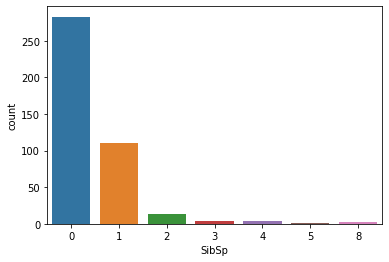

In [21]:
sns.countplot(x="SibSp",data=titanic)

In [ ]:
titanic.isnull().sum()

In [ ]:
sns.boxplot(x="Pclass",y="Age",data = titanic)

In [27]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
titanic.drop("Cabin",axis =1,inplace=True)

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [31]:
titanic.dropna(inplace=True)

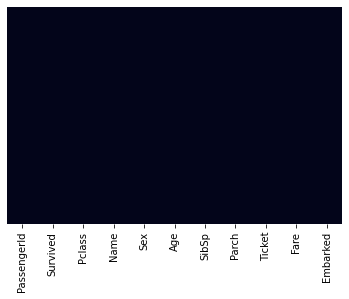

In [33]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [ ]:
titanic.isnull().sum()

In [ ]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head(5)

In [ ]:
pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)
pcl.head(5)

In [ ]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head(5)

In [42]:
titanic =pd.concat([titanic,sex,pcl,embark],axis=1)


In [43]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [64]:
titanic.drop(titanic.index[4], inplace=True)
titanic.drop(titanic.index[1], inplace=True)
titanic.drop(titanic.index[5], inplace=True)
titanic.drop(titanic.index[11], inplace=True)
titanic.drop(titanic.index[2], inplace=True)

In [65]:
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,3,34.5,0,0,7.8292,1,0,1,1,0
8,1,3,18.0,0,0,7.2292,0,0,1,0,0
16,0,2,35.0,0,0,12.3500,1,1,0,1,0
17,0,3,21.0,0,0,7.2250,1,0,1,0,0
20,0,1,55.0,1,0,59.4000,1,0,0,0,0


Trainset


In [69]:
x = titanic.drop("Survived",axis=1)

y = titanic["Survived"]

In [72]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.30,random_state=1)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

In [81]:
predections = logmodel.predict(X_test)

In [82]:
from sklearn.metrics import classification_report

In [83]:
classification_report(y_test,predections)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        61\n           1       1.00      1.00      1.00        34\n\n    accuracy                           1.00        95\n   macro avg       1.00      1.00      1.00        95\nweighted avg       1.00      1.00      1.00        95\n'